In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path

current_dir = Path.cwd()
if current_dir.name == "notebooks":
    project_root = current_dir.parent
    os.chdir(project_root)
    print(f"Cambiado directorio de trabajo a: {project_root}")
else:
    project_root = current_dir
    print(f"Directorio de trabajo: {project_root}")

sys.path.insert(0, str(project_root / "neural_net"))

from utils.visualization import *
(project_root / "figures").mkdir(exist_ok=True)
plt.style.use("figs.mplstyle")
plt.rcParams["figure.dpi"] = 300

Directorio de trabajo: /home/santiago/Universidad/Tercer Año/machineLearning/tps/tp3


<div style="font-family: Georgia, serif; font-size: 20px; line-height: 1.5;">

<style>
h1 { color: #8db2d7ff; font-weight: 700; }
h2 { color: #4a90e2; font-weight: 500; }
h3 { color: #6b8ea3; font-weight: 400; }
</style>

## 1. Exploración y Preprocesamiento de Datos

En esta sección exploramos el dataset EMNIST Bymerge que contiene:
- **809,555 imágenes** en total
- **47 clases** (dígitos 0-9, letras A-Z y a-z con algunas exclusiones)
- **Dimensiones:** 28x28 píxeles en escala de grises

In [ ]:
X_images = np.load(project_root / "data" / "X_images.npy")
y_images = np.load(project_root / "data" / "y_images.npy")

print("Dataset cargado exitosamente:")
print(f"Shape de X: {X_images.shape}")
print(f"Shape de y: {y_images.shape}")
print(f"Número de clases únicas: {len(np.unique(y_images))}")
print(f"Rango de valores en X: [{X_images.min()}, {X_images.max()}]")
print(f"Tipo de dato: {X_images.dtype}")

Dataset cargado exitosamente:
  - Shape de X: (809555, 28, 28)
  - Shape de y: (809555,)
  - Número de clases únicas: 47
  - Rango de valores en X: [0, 255]
  - Tipo de dato: uint8


<div style="font-family: Georgia, serif; font-size: 20px; line-height: 1.5;">

<style>
h1 { color: #8db2d7ff; font-weight: 700; }
h2 { color: #4a90e2; font-weight: 500; }
h3 { color: #6b8ea3; font-weight: 400; }
</style>


### 1.1 Visualización de una imagen por clase

Para entender la complejidad del problema, visualizamos una muestra de cada una de las 47 clases.
Esto nos permite observar la variabilidad y similitud entre diferentes caracteres.

/home/santiago/Universidad/Tercer Año/machineLearning/tps/tp3/neural_net/utils/visualization.py:338: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


✓ Plot saved to /home/santiago/Universidad/Tercer Año/machineLearning/tps/tp3/figures/one_per_class.png


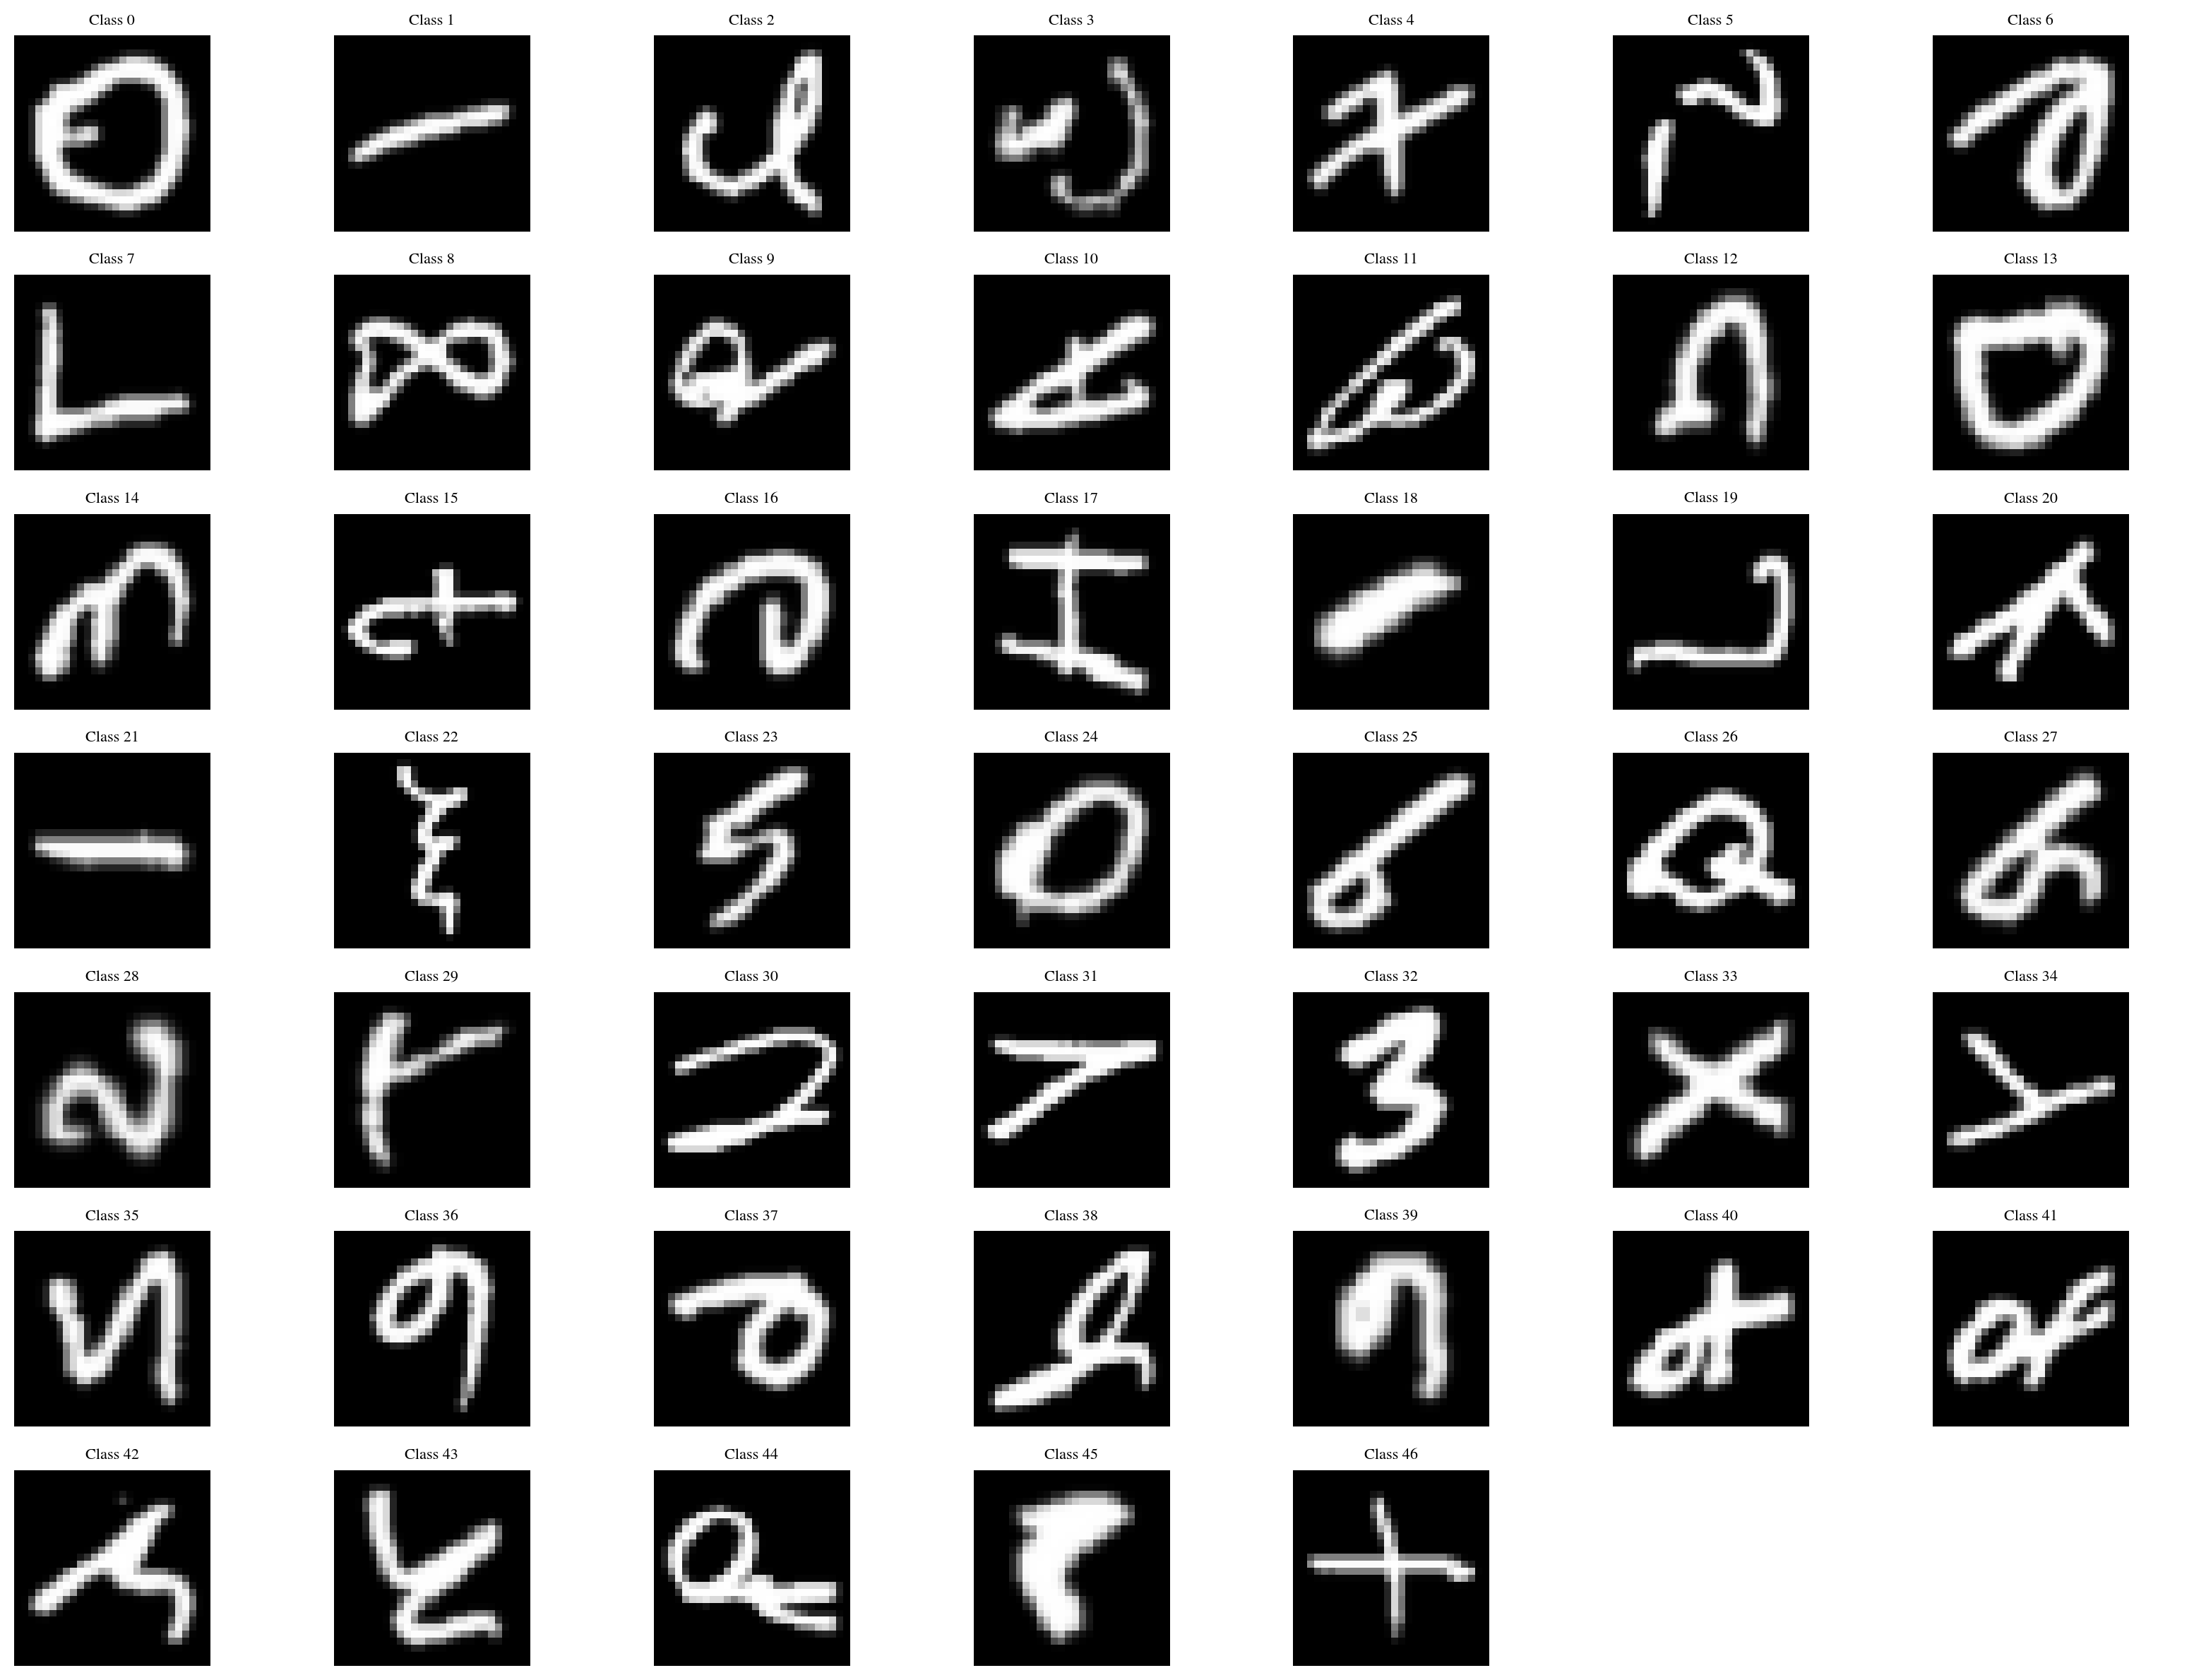

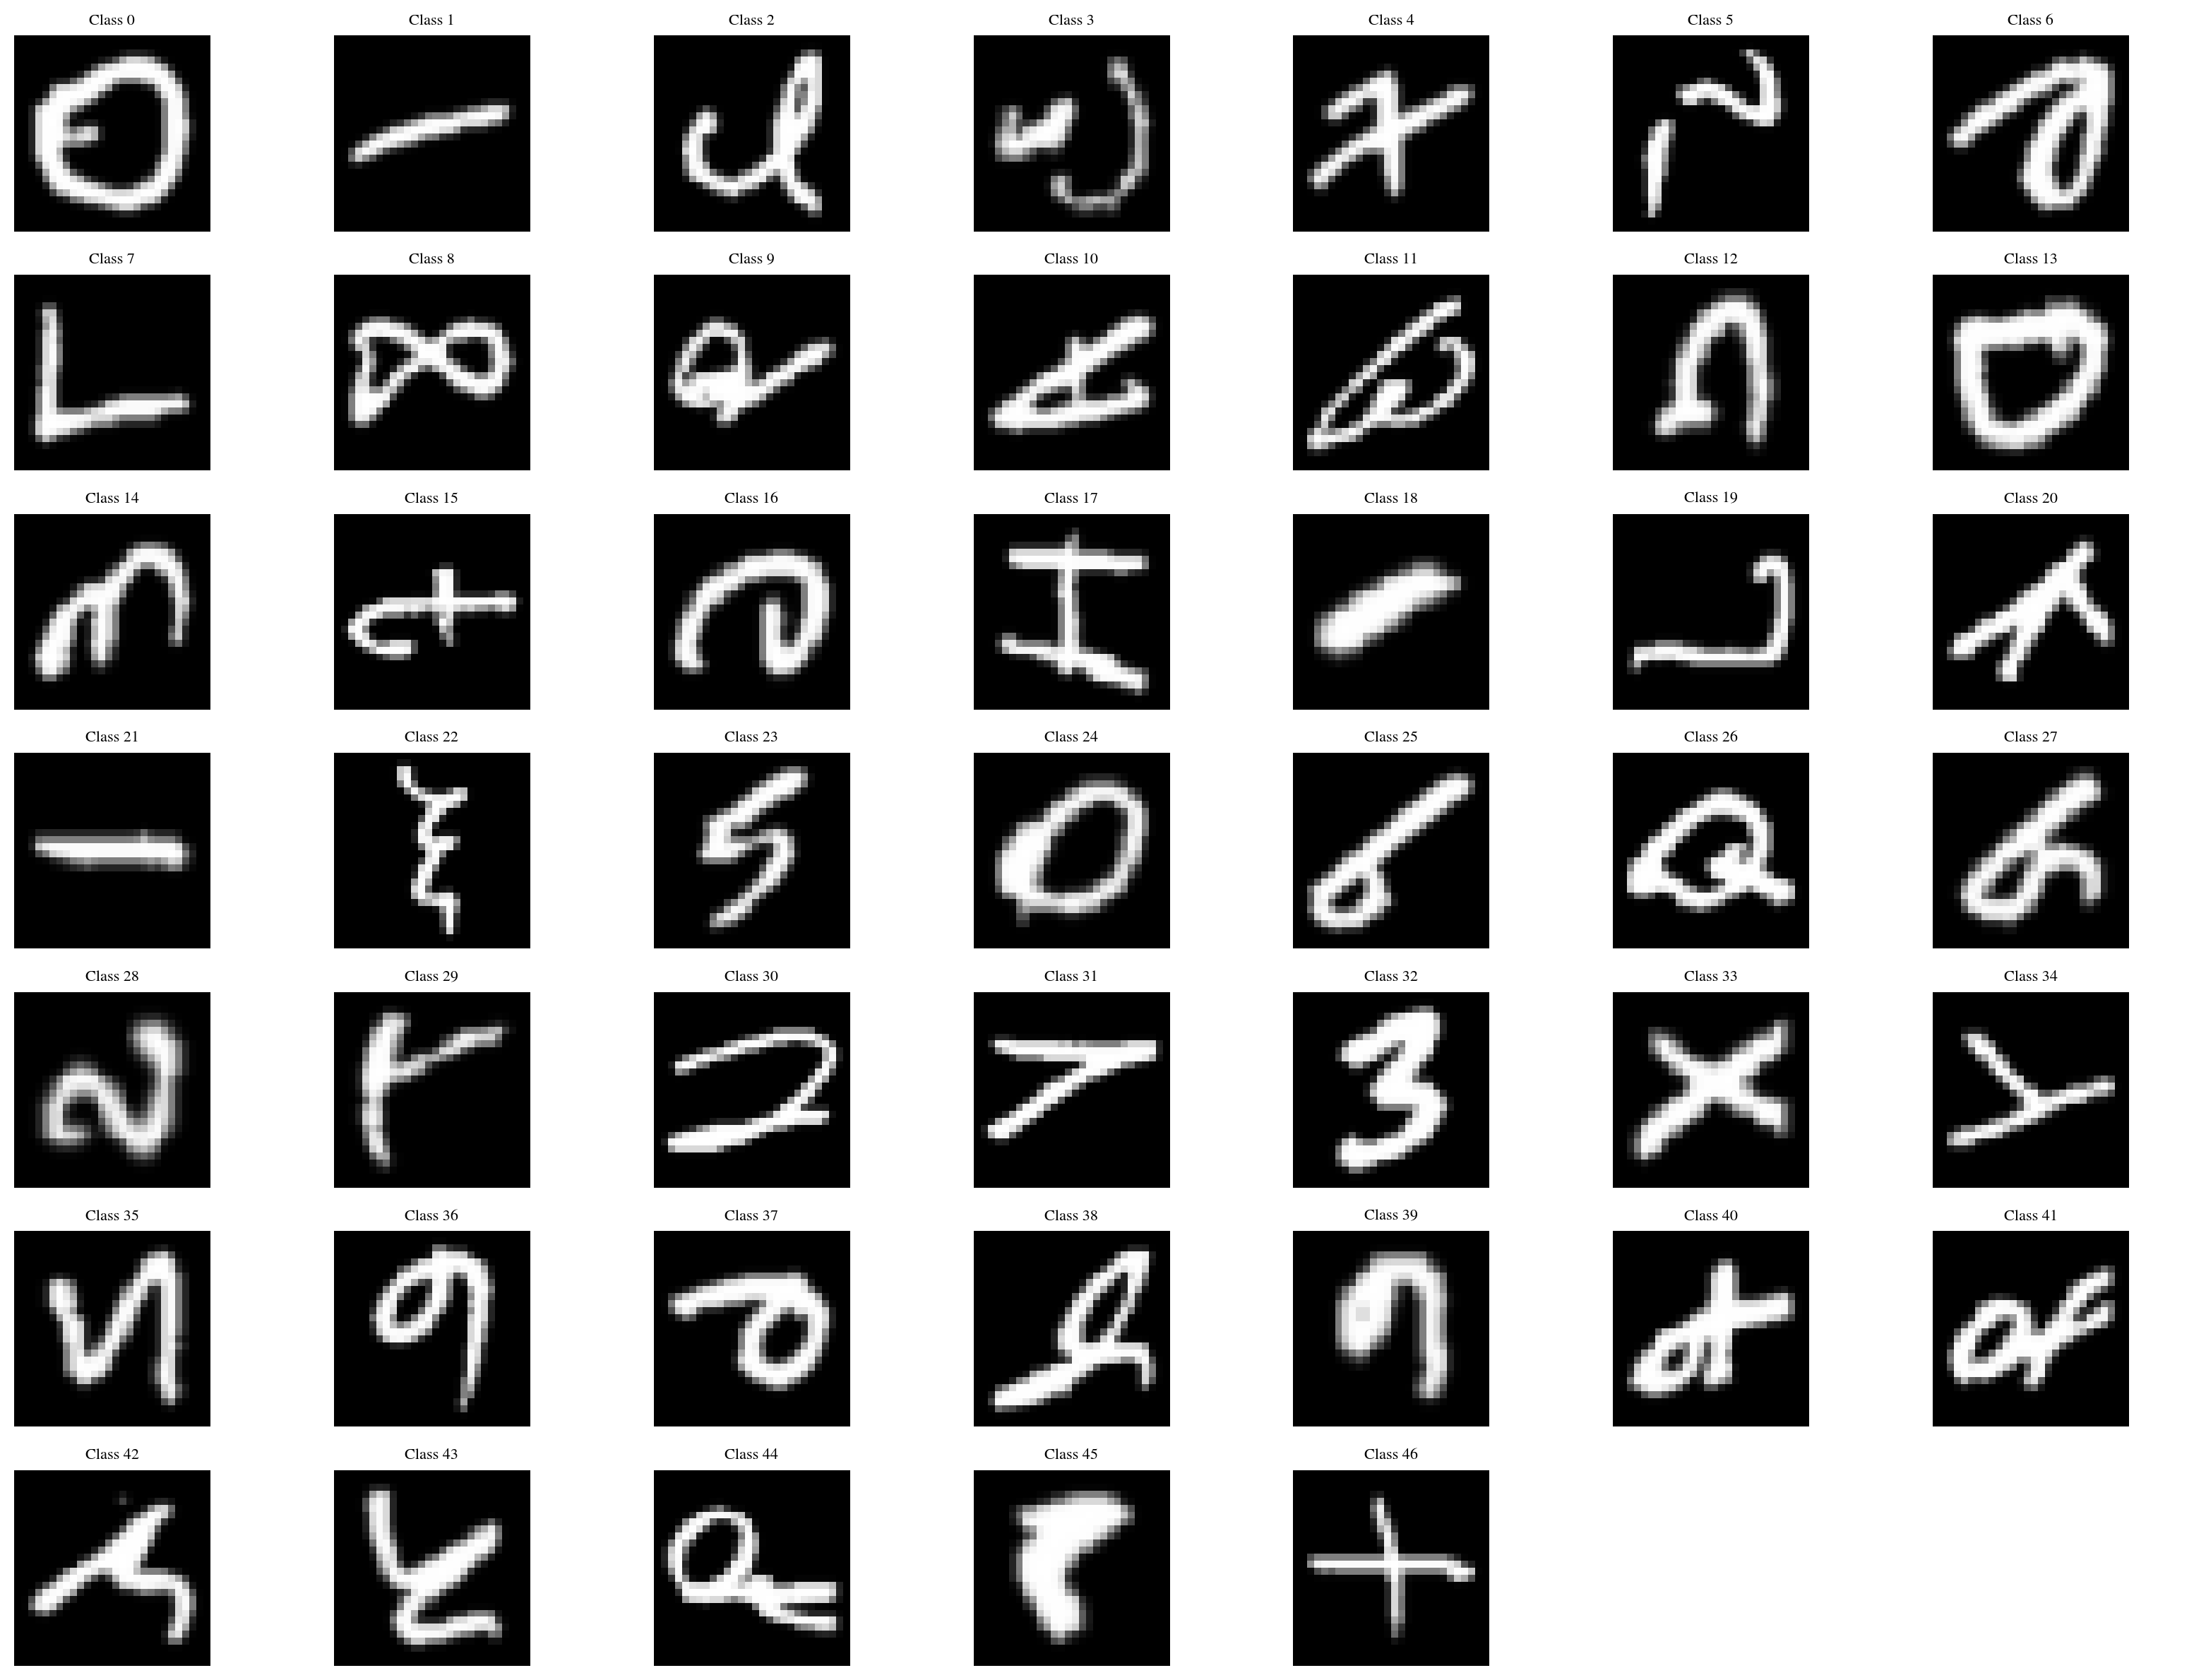

In [10]:
plot_one_per_class(
    X_images,
    y_images,
    save_path=project_root / "figures" / "one_per_class.png",
    figsize=(16, 12),
)

### 1.2 Distribución de clases

Analizamos la distribución de muestras por clase para identificar posibles desbalances
en el dataset que podrían afectar el entrenamiento de los modelos.

/home/santiago/Universidad/Tercer Año/machineLearning/tps/tp3/neural_net/utils/visualization.py:403: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


✓ Plot saved to /home/santiago/Universidad/Tercer Año/machineLearning/tps/tp3/figures/class_distribution.png


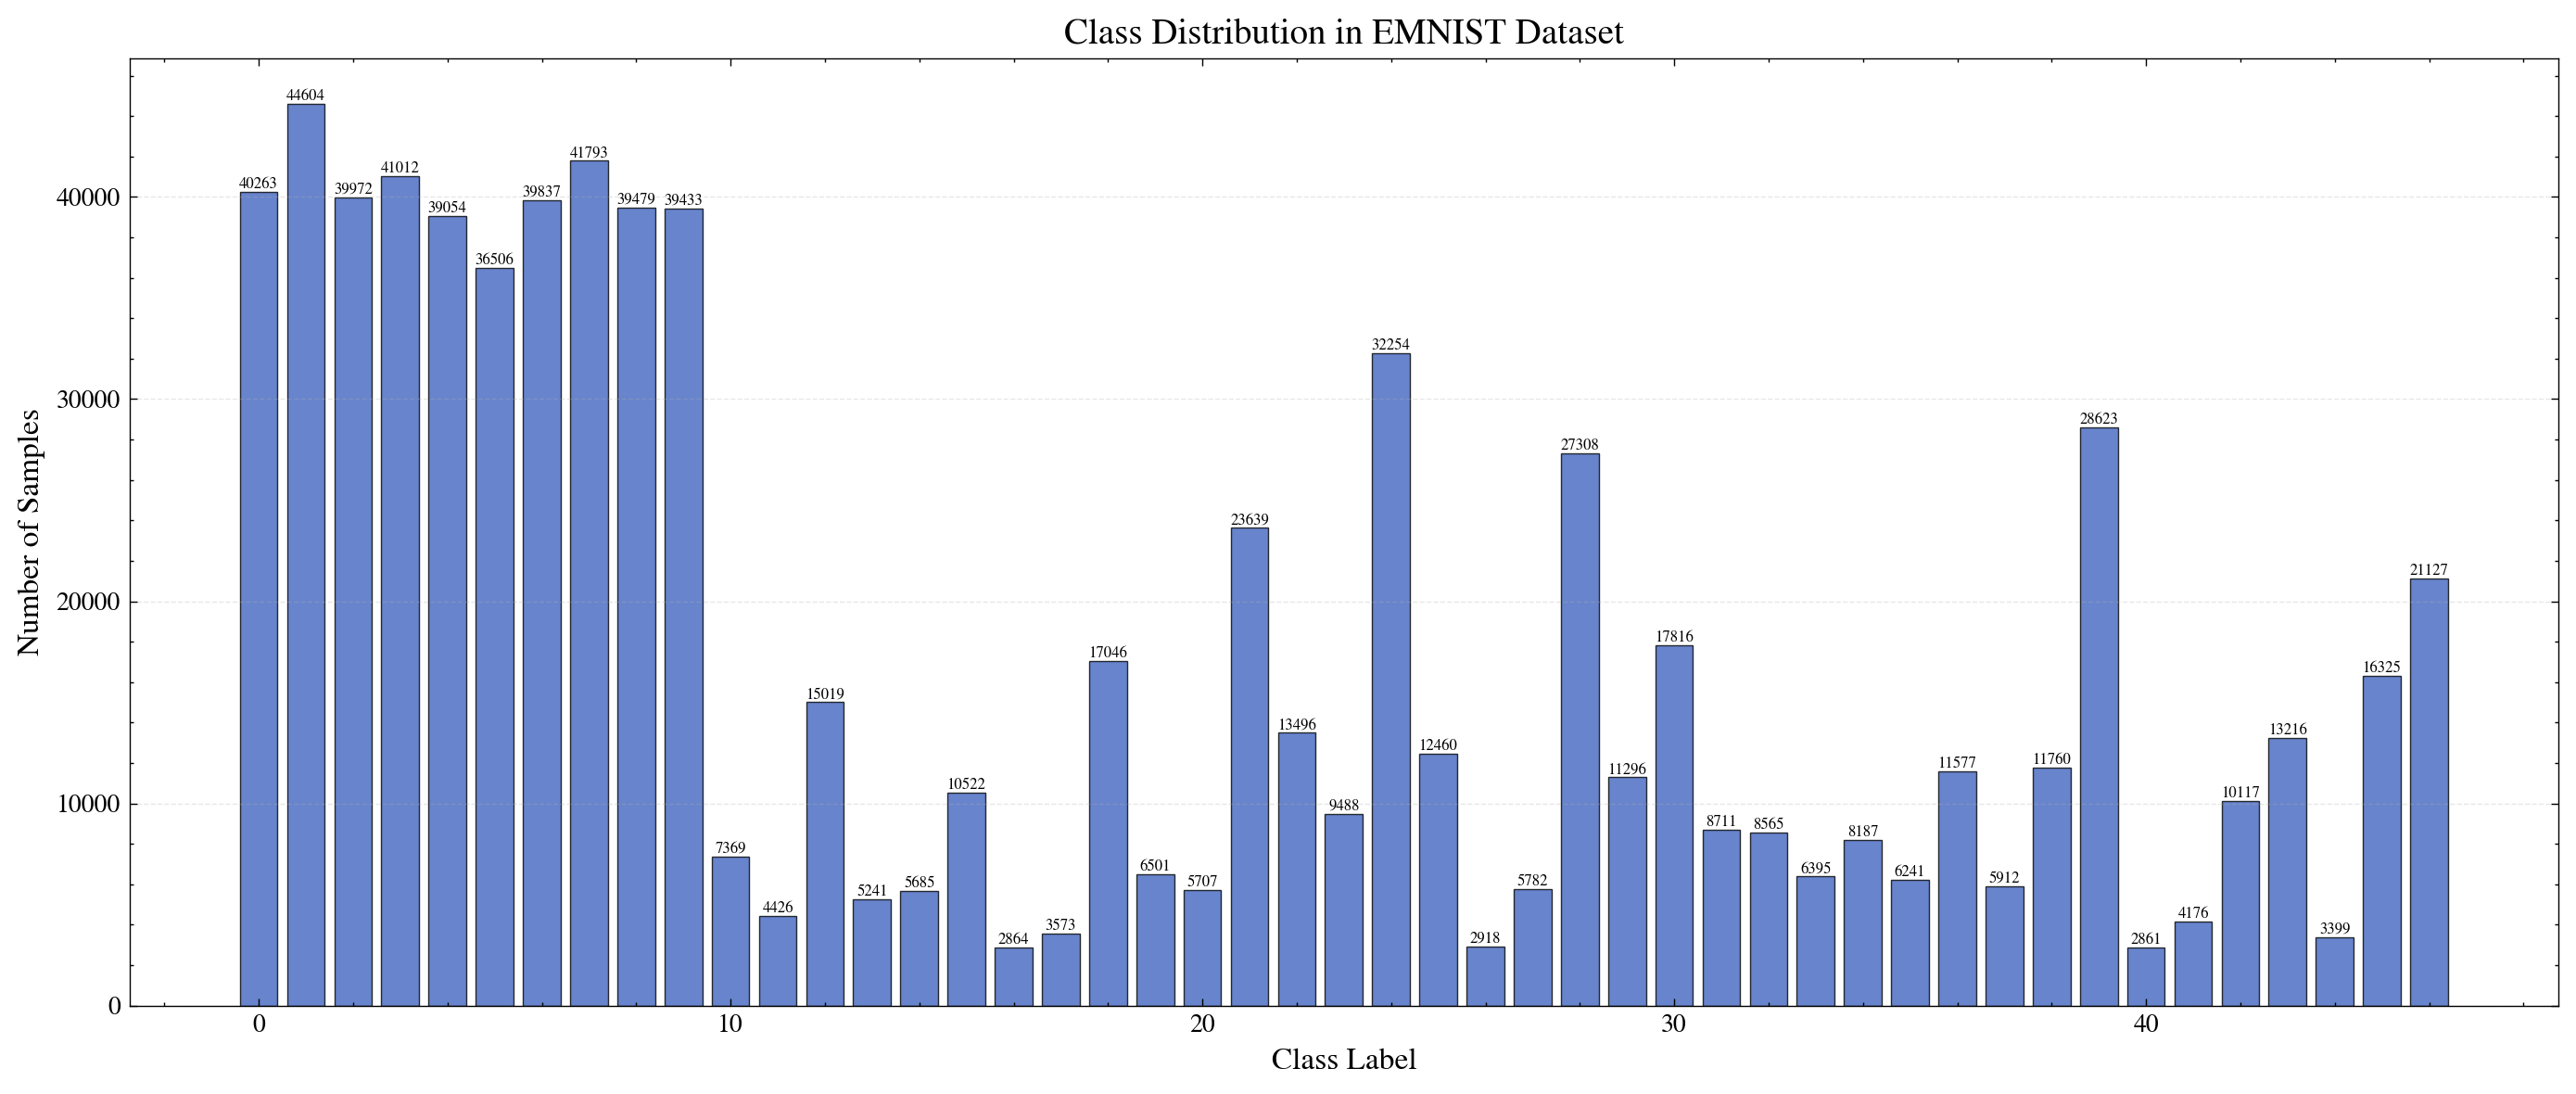


Estadísticas de distribución:
  - Media de muestras por clase: 17225
  - Std de muestras por clase: 13696
  - Clase con más muestras: 1 (44604 muestras)
  - Clase con menos muestras: 40 (2861 muestras)
  - Ratio max/min: 15.59


In [ ]:
plot_class_distribution(
    y_images,
    save_path=project_root / "figures" / "class_distribution.png",
    figsize=(14, 6),
)

unique_classes, counts = np.unique(y_images, return_counts=True)
print(f"Media de muestras por clase: {counts.mean():.0f}")
print(f"Std de muestras por clase: {counts.std():.0f}")
print(
    f"Clase con más muestras: {unique_classes[counts.argmax()]} ({counts.max()} muestras)"
)
print(
    f"Clase con menos muestras: {unique_classes[counts.argmin()]} ({counts.min()} muestras)"
)
print(f"Ratio max/min: {counts.max() / counts.min():.2f}")